# 声纹样本，样本变换，Jupyter实现

In [ ]:
%pip install audiomentations
%pip install audiomentations[extras]
%pip install matplotlib

In [2]:
import numpy as np
import librosa
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

d:\AAA\lab\audioSampleTransformation\.venv\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)
d:\AAA\lab\audioSampleTransformation\.venv\Lib\site-packages\lazy_loader\__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


In [3]:
! git clone https://github.com/lucas-fpaiva/survey-audio-aug.git

Cloning into 'survey-audio-aug'...


下段代码使用`librosa`库加载音频文件，并将其存储在`signal`变量中。`sr`变量是音频文件的采样率。
然后，代码将`signal`变量的前3秒传递给`ipd.Audio`函数，该函数将音频文件作为输出播放。这段代码的目的是播放音频文件。

In [8]:
signal, sr = librosa.load("./content/survey-audio-aug/rooster.wav") #form ESC dataset
signal = signal[0:3*sr]
ipd.Audio(signal, rate=sr)

# Audio Data Augmentation (ADA)
> 音频数据增强（ADA）

Consists of deformations directly in the audio raw.
> 包括直接在音频原始数据中进行的变形。

In [15]:
%pip install audioread

In [19]:
from audiomentations import Compose, AddBackgroundNoise, AddGaussianNoise, AddShortNoises, AddGaussianSNR
from audiomentations import Gain, LoudnessNormalization, Normalize, SpecFrequencyMask, TimeMask
from audiomentations import BandPassFilter , HighPassFilter, LowPassFilter # HighShelfFilter, LowShelfFilter, BandStopFilter PeakingFilter , AddImpulseResponse
from audiomentations import Mp3Compression, Resample
from audiomentations import Clip, ClippingDistortion, TanhDistortion
from audiomentations import PolarityInversion, Reverse, Shift

## ADA View function

In [37]:
signal_a1, sr = librosa.load("./content/data/wav48/p225/p225_001.wav")
signal_a2, sr = librosa.load("./content/data/wav48/p226/p226_001.wav")

In [38]:
def view_ADA(name_a1,name_a2):
  fig = plt.figure(figsize=(10, 6))#,dpi=300
  gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 1])

  #  Original signal in time domain
  time = np.linspace(0, len(signal) / sr, num=len(signal))
  y_min = np.min(signal)
  y_max = np.max(signal)

  x_max = len(signal)/sr

  ax0 = fig.add_subplot(gs[0,0])
  ax0.plot(signal, color='b', linewidth=1)
  ax0.set_title('Original',fontsize=16)
  ax0.axes.set_ylim(y_min,y_max)
  ax0.axes.set_xlim(0,x_max*sr)
  ax0.axes.get_xaxis().set_visible(False)

  ax1 = fig.add_subplot(gs[1, 0])

  M = librosa.feature.melspectrogram(y=signal, sr=sr, power=1)
  librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                          y_axis='log', x_axis='time', ax=ax1)
  ax1.set_ylabel(' ')
  ax1.set_xlabel('  ')
  ax1.axes.set_xlim(0,x_max)

  ax2= fig.add_subplot(gs[0,1])
  ax2.plot(signal_a1, color='b', linewidth=1)
  ax2.set_title(name_a1,fontsize=16)
  ax2.set_ylim(y_min,y_max)
  ax2.axes.set_xlim(0,x_max*sr)
  ax2.axes.get_yaxis().set_visible(False)
  ax2.axes.get_xaxis().set_visible(False)



  ax3 = fig.add_subplot(gs[1, 1])
  M = librosa.feature.melspectrogram(y=signal_a1, sr=sr, power=1)
  librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                          y_axis='log', x_axis='time', ax=ax3)
  ax3.axes.get_yaxis().set_visible(False)
  ax3.set_ylabel(' ')
  ax3.set_xlabel('time(s)',fontsize=16)
  ax3.axes.set_xlim(0,x_max)

  if name_a2 != None:
    ax4= fig.add_subplot(gs[0,2])
    ax4.plot(signal_a2, color='b', linewidth=1)
    ax4.set_title(name_a2,fontsize=16)
    ax4.axes.set_ylim(y_min,y_max)
    ax4.axes.set_xlim(0,x_max*sr)
    ax4.axes.get_yaxis().set_visible(False)
    ax4.axes.get_xaxis().set_visible(False)

    ax5 = fig.add_subplot(gs[1, 2])
    M = librosa.feature.melspectrogram(y=signal_a2, sr=sr, power=1)
    librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                            y_axis='log', x_axis='time', ax=ax5)
    ax5.axes.get_yaxis().set_visible(False)
    ax5.axes.set_xlim(0,x_max)
    ax5.set_ylabel(' ')
    ax5.set_xlabel('  ')

# def save_im(name):
#   dir ='/content/drive/MyDrive/01_projeto_danca_para_surdos/Publicações/Survey_data_aug/Figuras/name.eps'
#   plt.savefig(dir.replace('name',name), bbox_inches="tight")

## Shifting Pitch (SP)

With [librosa](https://librosa.org/doc/latest/effects.html)

In [52]:
import librosa
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

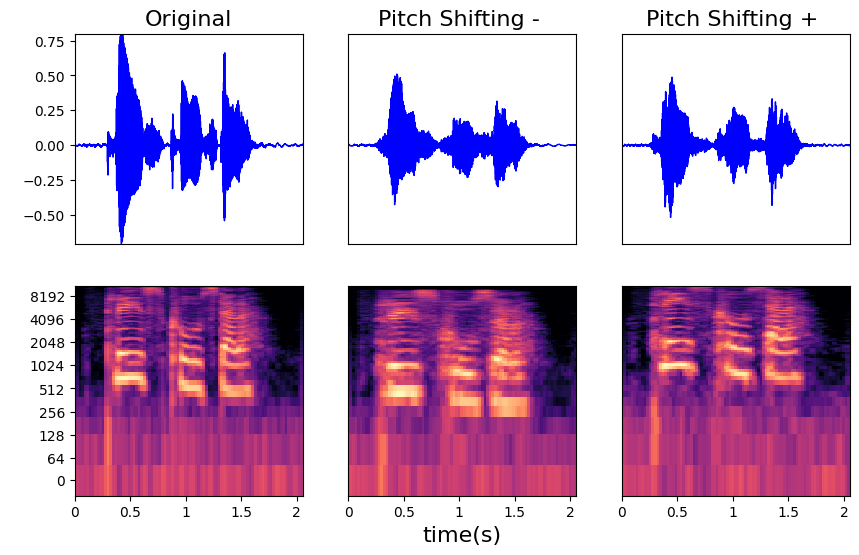

In [55]:
signal, sr = librosa.load('./content/data/wav48/p225/p225_001.wav')
signal_a1 = librosa.effects.pitch_shift(signal, sr=sr, n_steps=-6)
signal_a2 = librosa.effects.pitch_shift(signal, sr=sr, n_steps=6)
name_a1 = "Pitch Shifting - "
name_a2 = "Pitch Shifting + "
view_ADA(name_a1,name_a2)

In [ ]:
ipd.Audio(signal_a1 , rate=sr)

In [ ]:
ipd.Audio(signal_a2 , rate=sr)

## Time Stretching (TS)
> 改变音频的速度，不改变音调

With [librosa](https://librosa.org/doc/latest/effects.html)

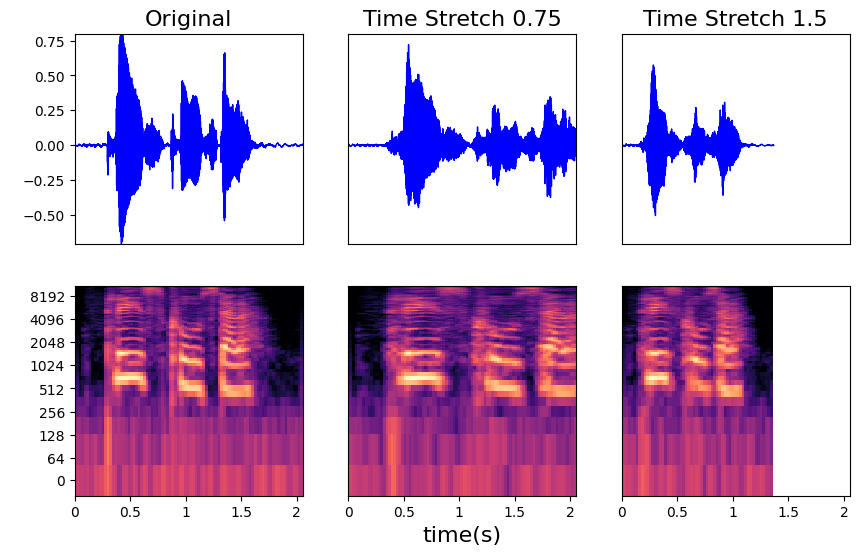

In [57]:
signal_a1 = librosa.effects.time_stretch(signal, rate=0.75)
name_a1 = "Time Stretch 0.75"
signal_a2 = librosa.effects.time_stretch(signal, rate=1.5)
name_a2 = "Time Stretch 1.5"

view_ADA(name_a1, name_a2)

In [59]:
import IPython.display as ipd

In [64]:
# Define signal_a1
signal_a1 = librosa.effects.time_stretch(signal, rate=0.75)

In [65]:
# Play signal_a1
ipd.Audio(signal_a1 , rate=sr)

In [67]:
ipd.Audio(signal_a2 , rate=sr)

## Loudness (L)
> 声音的响度

With [audiomentations](https://github.com/iver56/audiomentations)


It is also possible to use `LoudnessNormalization` to volume adjustment transformation.
> 也可以使用`LoudnessNormalization`来进行音量调整变换。



In [71]:
from audiomentations import Compose, Gain

bug：调整后，音频文件音量没有变化

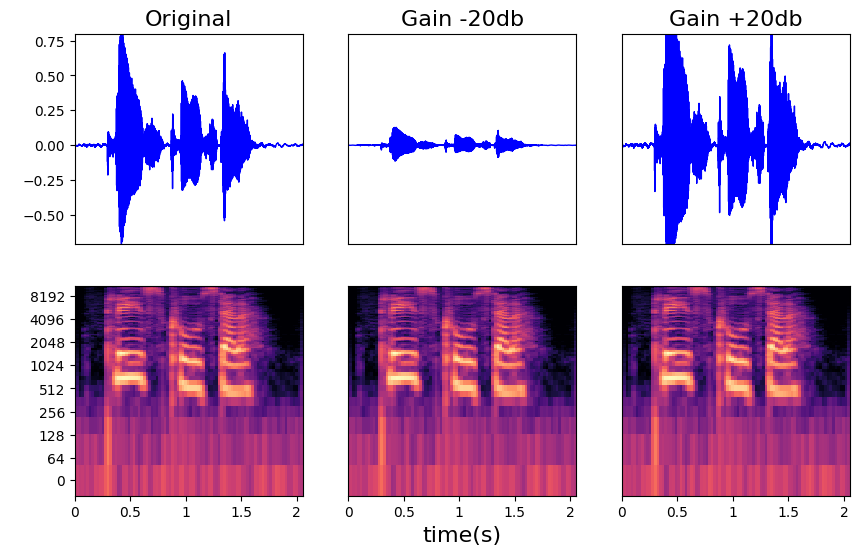

In [79]:
augment = Compose([Gain(min_gain_in_db=-20, max_gain_in_db=0, p=1)])
signal_a1 = augment(samples=signal, sample_rate=int(sr))
name_a1 = "Gain -20db"

augment = Compose([Gain(min_gain_in_db=0, max_gain_in_db=20, p=1)])
signal_a2 = augment(samples=signal, sample_rate=int(sr))
name_a2 = "Gain +20db"

view_ADA(name_a1,name_a2)


In [80]:
ipd.Audio(signal_a1 , rate=sr)

In [81]:
ipd.Audio(signal_a2 , rate=sr)

## Background Noise (BN)
With [audiomentations](https://github.com/iver56/audiomentations)

Noises from [ESC dataset](https://github.com/karolpiczak/paper-2015-esc-dataset)

It is also possible to use `AddShortNoises` add background noise.

In [83]:
from audiomentations import Compose, AddBackgroundNoise

d:\AAA\lab\audioSampleTransformation\.venv\Lib\site-packages\audiomentations\core\audio_loading_utils.py:37: UserWarning: d:\AAA\lab\audioSampleTransformation\content\survey-audio-aug\urban\urban1.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(
d:\AAA\lab\audioSampleTransformation\.venv\Lib\site-packages\audiomentations\core\audio_loading_utils.py:37: UserWarning: d:\AAA\lab\audioSampleTransformation\content\survey-audio-aug\animals\animal2.wav had to be resampled from 44100 hz to 22050 hz. This hurt execution time.
  warnings.warn(


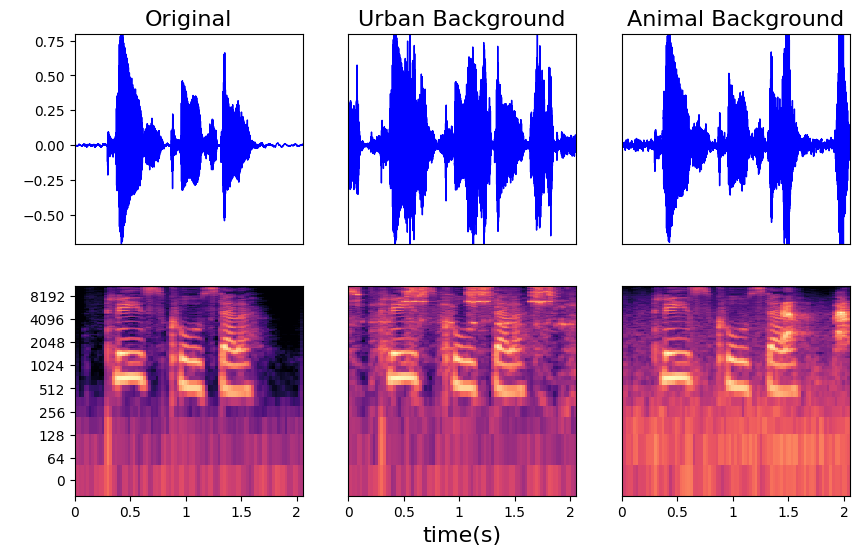

In [85]:
noise="./content/survey-audio-aug/urban"

augment = Compose([AddBackgroundNoise(sounds_path=noise, min_snr_in_db=1, max_snr_in_db=2,p=1, noise_rms="relative")])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Urban Background"


noise="./content/survey-audio-aug/animals"

augment = Compose([AddBackgroundNoise(sounds_path=noise, min_snr_in_db=1, max_snr_in_db=2, p=1,noise_rms="relative")])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Animal Background"

view_ADA(name_a1,name_a2)

In [86]:
ipd.Audio(signal_a1 , rate=sr)

In [87]:
ipd.Audio(signal_a2 , rate=sr)

## Synthetic Noise (SN)
> 合成噪声

With [audiomentations](https://github.com/iver56/audiomentations)


It is also possible to use `AddGaussianSNR` to add synthetic noise.
> 也可以使用`AddGaussianSNR`来添加合成噪声。

In [92]:
from audiomentations import Compose, AddGaussianNoise

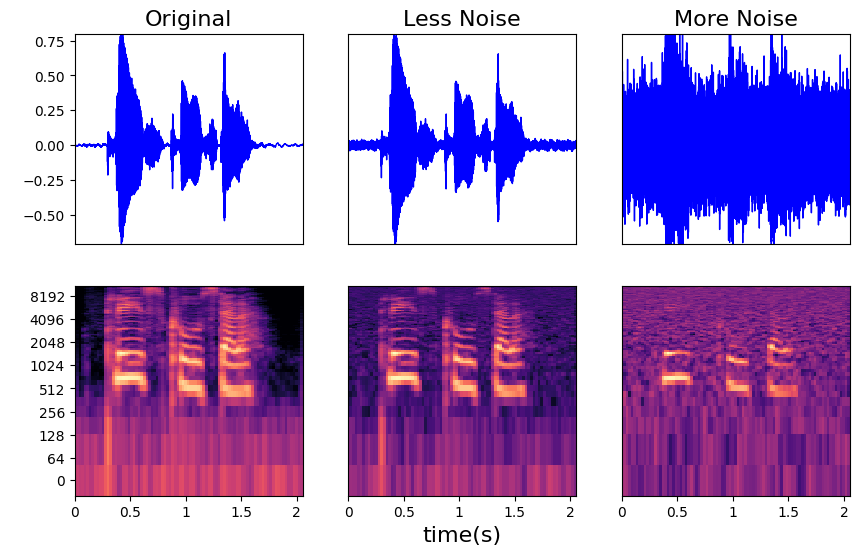

In [93]:
augment = Compose([AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.02, p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Less Noise"


augment = Compose([AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.2, p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "More Noise"

view_ADA(name_a1,name_a2)

In [94]:
ipd.Audio(signal_a1 , rate=sr)

In [95]:
ipd.Audio(signal_a2 , rate=sr)

## Silence Trimming (ST)

对音频信号进行修剪，去除静音部分。

With [librosa](https://librosa.org/doc/latest/effects.html)

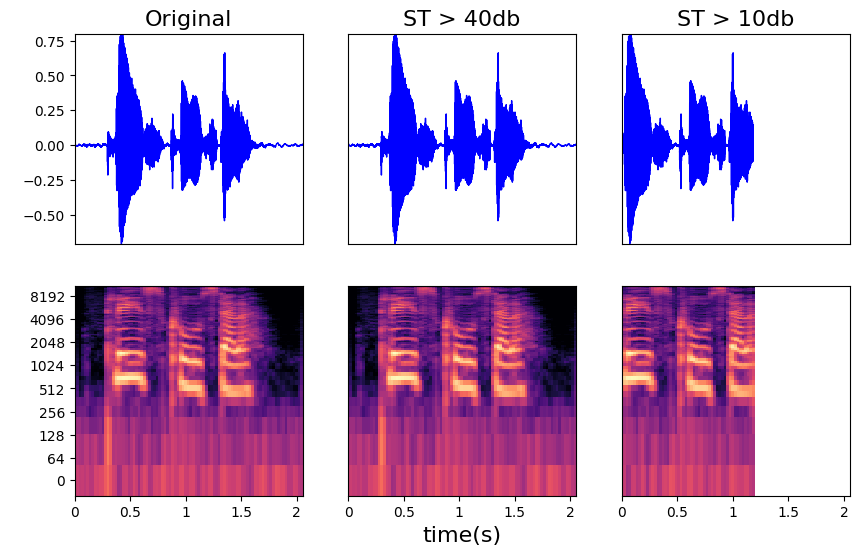

In [96]:
signal_a1,_ = librosa.effects.trim(signal)
name_a1 = "ST > 40db"
signal_a2,_ = librosa.effects.trim(signal, top_db=10)
name_a2 = "ST > 10db"

view_ADA(name_a1,name_a2)

In [97]:
ipd.Audio(signal_a1 , rate=sr)

In [98]:
ipd.Audio(signal_a2 , rate=sr)

## Time Shifting (TiS)
> 时间偏移

With [audiomentations](https://github.com/iver56/audiomentations)

In [100]:
from audiomentations import Compose, Shift

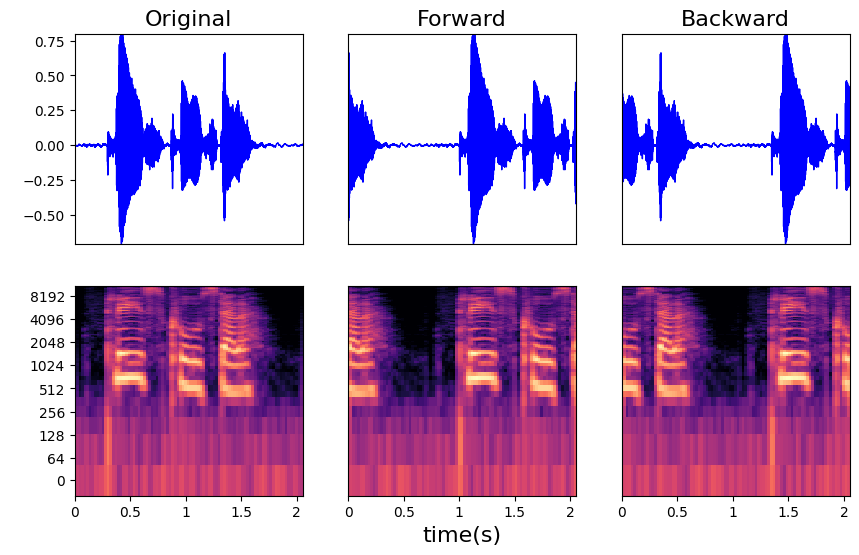

In [102]:
augment = Compose([Shift(min_fraction=0, max_fraction=0.5, p=1)])
signal_a1 = augment(samples=signal, sample_rate=int(sr))
name_a1 = "Forward"


augment = Compose([Shift(min_fraction=-0.5, max_fraction=0, p=1)])
signal_a2 = augment(samples=signal, sample_rate=int(sr))

view_ADA(name_a1, name_a2)

In [103]:
ipd.Audio(signal_a1 , rate=sr)

In [104]:
ipd.Audio(signal_a2 , rate=sr)

## Clipping (C)
> 剪辑

With [audiomentations](https://github.com/iver56/audiomentations)

It is also possible to use `ClippingDistortion` to clipping transformation.
> 也可以使用`ClippingDistortion`来进行剪辑变换。

剪辑是指将音频信号的振幅限制在某个范围内，超出该范围的部分将被截断。

In [106]:
from audiomentations import Compose, Clip

在下面的代码中，使用audiomentations库的Clip函数来对音频信号进行剪辑。

在第一次调用Clip函数时，将音频信号的振幅限制在-0.65和0.65之间。所有振幅超过此范围的样本将被截断。

在第二次调用Clip函数时，将音频信号的振幅限制在-0.3和0.3之间。所有振幅超过此范围的样本将被截断。

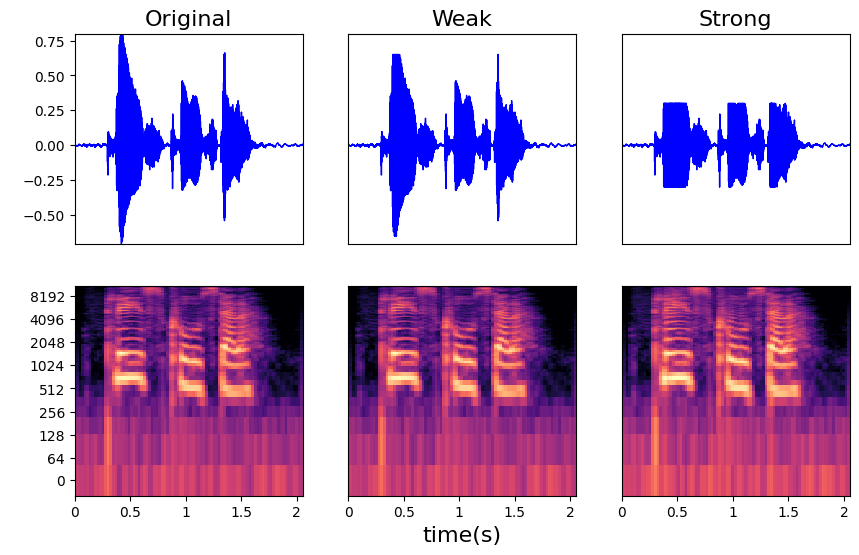

In [107]:
augment = Compose([Clip(a_min=-0.65, a_max=0.65, p=1)])
signal_a1 = augment(samples=signal, sample_rate=int(sr))
name_a1 = "Weak"


augment = Compose([Clip(a_min=-0.3, a_max=0.3, p=1)])
signal_a2 = augment(samples=signal, sample_rate=int(sr))
name_a2 = "Strong"

view_ADA(name_a1, name_a2)

In [110]:
ipd.Audio(signal_a1 , rate=sr)

In [111]:
ipd.Audio(signal_a2 , rate=sr)

## 无法使用 Impulse Response (IR)
> 脉冲响应

With [audiomentations](https://github.com/iver56/audiomentations)

Impulse responses are from [The MIT McDermott dataset ](https://mcdermottlab.mit.edu/Reverb/IR_Survey.html)
> 脉冲响应来自[MIT麦克德莫特数据集](https://mcdermottlab.mit.edu/Reverb/IR_Survey.html)

In [115]:
%pip install --upgrade audiomentations

Note: you may need to restart the kernel to use updated packages.


In [116]:
from audiomentations import Compose, AddImpulseResponse

ImportError: cannot import name 'AddImpulseResponse' from 'audiomentations' (d:\AAA\lab\audioSampleTransformation\.venv\Lib\site-packages\audiomentations\__init__.py)

In [112]:
dir="/content/survey-audio-aug"

augment = Compose([AddImpulseResponse(ir_path= dir,p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "IR1"


augment = Compose([ AddImpulseResponse(ir_path= dir,p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "IR2"

view_ADA(name_a1,name_a2)

NameError: name 'AddImpulseResponse' is not defined

In [ ]:
ipd.Audio(signal_a1 , rate=sr)

In [ ]:
ipd.Audio(signal_a2 , rate=sr)

## Filter (F)
> 滤波器

With [audiomentations](https://github.com/iver56/audiomentations)


It is also possible to use `BandPassFilter` to add filter transformation.
> 也可以使用`BandPassFilter`来添加滤波器变换。


In [120]:
from audiomentations import Compose, LowPassFilter, HighPassFilter

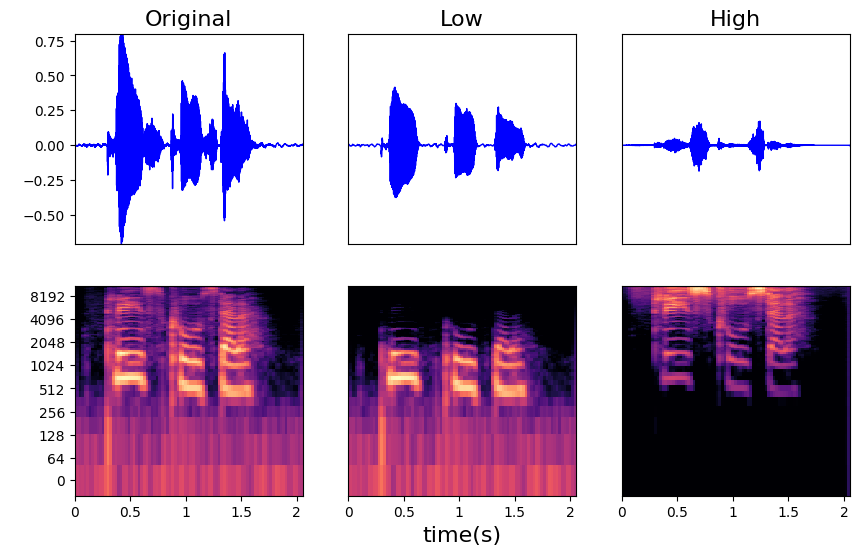

In [124]:
augment = Compose([LowPassFilter(min_cutoff_freq=0, max_cutoff_freq=1000, p=1)])
signal_a1 = augment(samples=signal, sample_rate=int(sr))
name_a1 = "Low"


augment = Compose([HighPassFilter(min_cutoff_freq=5000, max_cutoff_freq=8000, p=1)])
signal_a2 = augment(samples=signal, sample_rate=int(sr))
name_a2 = "High"

view_ADA(name_a1, name_a2)

In [125]:
ipd.Audio(signal_a1 , rate=sr)

In [126]:
ipd.Audio(signal_a2 , rate=sr)

## 无法使用 Random Maskn (RM)
> 随机掩码

With [audiomentations](https://github.com/iver56/audiomentations)

In [ ]:
%pip install --upgrade audiomentations
from audiomentations import Compose, TimeMask
from audiomentations import FrequencyMask

先使用`audiomentations`库中的`Compose`函数来对音频信号进行时间掩蔽和频率掩蔽，然后使用`view_ADA`函数来可视化掩蔽后的音频信号。

在第一次调用`Compose`函数时，使用了`TimeMask`函数来对音频信号进行时间掩蔽。时间掩蔽是指在音频信号中随机选择一段时间，并将该时间段内的音频信号替换为0。在这里，使用了`p=1`参数来表示对所有音频信号都进行时间掩蔽。

在第二次调用`Compose`函数时，使用了`FrequencyMask`函数来对音频信号进行频率掩蔽。频率掩蔽是指在音频信号中随机选择一个频率带，并将该频率带内的音频信号替换为0。在这里，使用了`min_frequency_band=0.3`和`max_frequency_band=.9`参数来表示选择的频率带范围为0.3到0.9之间，并且使用了`p=1`参数来表示对所有音频信号都进行频率掩蔽。

掩蔽后的音频信号存储在`signal_a1`和`signal_a2`变量中，并且分别用`name_a1`和`name_a2`变量来描述掩蔽的条件。最后，使用`view_ADA`函数来可视化掩蔽后的音频信号。`view_ADA`函数是一个自定义函数，用于可视化音频信号。

In [ ]:
augment = Compose([TimeMask(p=1)])
signal_a1 = augment(samples=signal, sample_rate=int(sr))
name_a1 = "Time"


augment = Compose([FrequencyMask(min_frequency_band=0.3, max_frequency_band=0.9, p=1)])
signal_a2 = augment(samples=signal, sample_rate=int(sr))
name_a2 = "Frequency"

view_ADA(name_a1, name_a2)

In [ ]:
ipd.Audio(signal_a1 , rate=sr)

In [133]:
ipd.Audio(signal_a2 , rate=sr)

## 无法使用 MP3 Compression (MC)
> MP3压缩
未安装ffmpeg
With [audiomentations](https://github.com/iver56/audiomentations)

In [140]:
from audiomentations import Compose, Mp3Compression

In [ ]:
augment = Compose([Mp3Compression(p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Default"


augment = Compose([Mp3Compression(min_bitrate= 8, max_bitrate= 16, p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Strong"

view_ADA(name_a1,name_a2)

In [ ]:
ipd.Audio(signal_a1 , rate=sr)

In [ ]:
ipd.Audio(signal_a2 , rate=sr)

## Inversion (I)
> 反转

With [audiomentations](https://github.com/iver56/audiomentations)

In [145]:
from audiomentations import Compose, PolarityInversion, Reverse

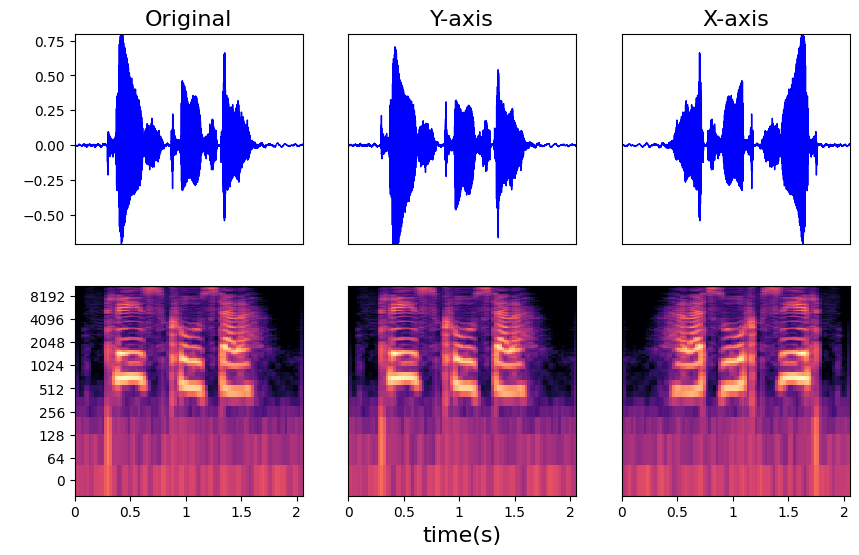

In [146]:
augment = Compose([PolarityInversion(p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Y-axis"


augment = Compose([Reverse(p=1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "X-axis"

view_ADA(name_a1,name_a2)

In [147]:
ipd.Audio(signal_a1 , rate=sr)

In [148]:
ipd.Audio(signal_a2 , rate=sr)

##  Peak Normalization (PN)
> 峰值归一化 

With [audiomentations](https://github.com/iver56/audiomentations)

In [150]:
from audiomentations import Compose, Normalize

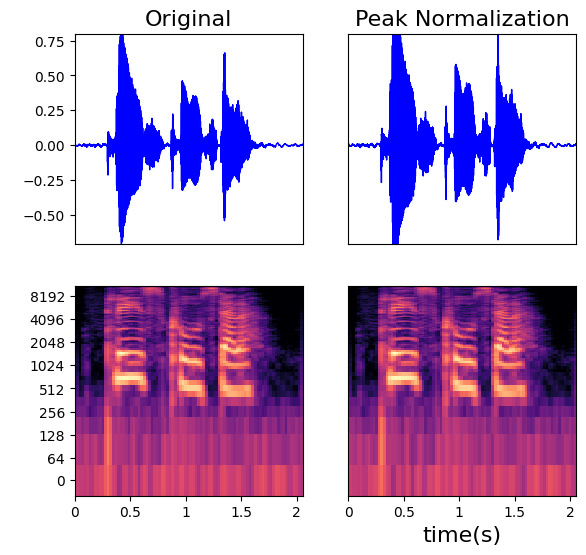

In [151]:
augment = Compose([Normalize(p=1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Peak Normalization"

name_a2 = None

view_ADA(name_a1,name_a2)

In [152]:
ipd.Audio(signal_a1 , rate=sr)

##  Tangent Distortion (TD)
With [audiomentations](https://github.com/iver56/audiomentations)

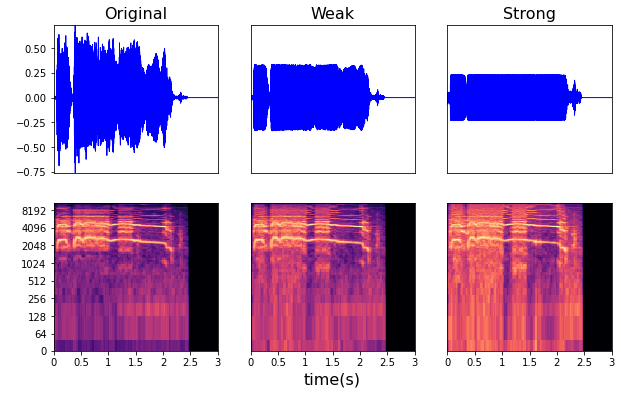

In [ ]:
augment = Compose([TanhDistortion(min_distortion= 0.01, max_distortion= 0.5, p = 1)])
signal_a1 = augment(samples=signal, sample_rate=sr)
name_a1 = "Weak"


augment = Compose([TanhDistortion(min_distortion= 0.5, max_distortion= 1, p = 1)])
signal_a2 = augment(samples=signal, sample_rate=sr)
name_a2 = "Strong"

view_ADA(name_a1,name_a2)

In [ ]:
ipd.Audio(signal_a1 , rate=sr)

In [ ]:
ipd.Audio(signal_a2 , rate=sr)

# Spectrogram Data Augmentation

It is a group of techniques designed to apply deformations in spectrograms.

With [audiomentations](https://github.com/iver56/audiomentations)



In [ ]:
%pip install audiomentations

In [ ]:
from audiomentations import SpecCompose, SpecChannelShuffle, SpecFrequencyMask

## SDA View function


In [ ]:
def SDA_view():
  fig = plt.figure(figsize=(10,3))#,dpi=300
  gs = gridspec.GridSpec(nrows=1, ncols=3)

  ax0 = fig.add_subplot(gs[0,0])
  librosa.display.specshow(librosa.core.amplitude_to_db(M, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax0)
  ax0.set_title('Original',fontsize=16)
  ax0.axis('off')



  ax1 = fig.add_subplot(gs[0,1])
  librosa.display.specshow(librosa.core.amplitude_to_db(M1, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax1)
  ax1.set_title(name1,fontsize=16)
  ax1.axis('off')



  ax2 = fig.add_subplot(gs[0,2])
  batch = it.next()
  librosa.display.specshow(librosa.core.amplitude_to_db(M2, ref=np.max),
                        y_axis='log', x_axis='time', ax=ax2)
  ax2.set_title(name2,fontsize=16)
  ax2.axis('off')


## Spectrogram Random Mask (SRM)
The audiomentations library doesn't have a native time mask function, so we chew on the transposed spectrogram and return the spectrogram to its original orientation to simulate this effect.

<Figure size 720x432 with 0 Axes>

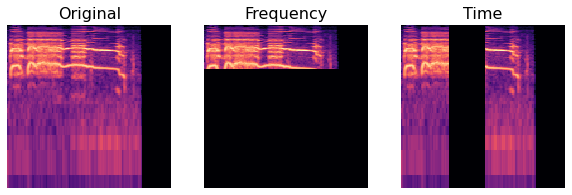

In [ ]:
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 1])

M = librosa.feature.melspectrogram(y=signal, sr=sr, power=1)


augment = SpecCompose( [SpecFrequencyMask(p=1)])
M1 = augment(M)
name1 = 'Frequency'

M2= augment(M.transpose()).transpose() #simulating the time mask effect
name2= 'Time'

SDA_view()

## Spectrogram Channel Shuffle (SCS)

<Figure size 720x432 with 0 Axes>

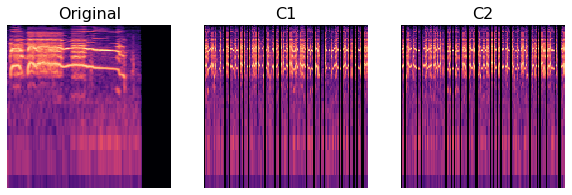

In [ ]:
fig = plt.figure(figsize=(10, 6))#,dpi=300
gs = gridspec.GridSpec(nrows=2, ncols=3, height_ratios=[1, 1])

M = librosa.feature.melspectrogram(y=signal, sr=sr, power=1)

augment = SpecCompose( [SpecChannelShuffle(p=1)])
M1 = augment(np.array([M,M]))[0,:,:]
name1 = 'C1'

M2= augment(np.array([M,M]))[1,:,:]
name2= 'C2'

SDA_view()